# Importing Libraries

In [2]:
import email
import os
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Functions To Read Emails

In [3]:
def read_email(fn):
    f = open(fn,"r")
    try:
        a = f.read()
        return email.message_from_string(a)
    except:
        return ""

In [4]:
def read_all_email(direc):
    emails = []
    for i in os.listdir(direc):
        b = read_email(direc+i)
        if len(b)!=0:
            emails.append(b)
    return emails

In [5]:
def clean_string(s):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    str = re.sub(cleanr,"",s)
    str = str.split("\n")
    l = ""
    for i in str:
        if len(i)>0:
            l += " "+i
    return l

In [6]:
def get_content(l):
    sender = []
    subject = []
    body = []
    for i in l:
        sender.append(i["to"])
        subject.append(i["subject"])
        body.append(clean_string(str(i.get_payload())))
    return sender, subject, body     

# Reading Emails

In [7]:
ham = read_all_email("ham/")
spam = read_all_email("spam/")

In [47]:
print(spam[0]["to"])

<dcek1a1@netsgo.com>


# Getting Email Content

In [9]:
hsender, hsubject, hbody = get_content(ham)
ssender, ssubject, sbody = get_content(spam)

In [10]:
hsender = np.array(hsender)
hsubject = np.array(hsubject)
hbody = np.array(hbody)
ssender = np.array(ssender)
ssubject = np.array(ssubject)
sbody = np.array(sbody)

In [11]:
print(np.array(hsender)[:,np.newaxis])

[['Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>']
 ['"\'zzzzteana@yahoogroups.com\'" <zzzzteana@yahoogroups.com>']
 ['zzzzteana <zzzzteana@yahoogroups.com>']
 ...
 ['yyyy@example.com']
 ['yyyy@example.com']
 ['yyyy@example.com']]


# Creating Dataset (DataFrame)

In [12]:
ham_label = np.array(["ham"]*len(hsender))
spam_label = np.array(["spam"]*len(ssender))
ham_df = pd.DataFrame(np.concatenate([np.array(hsender)[:,np.newaxis],np.array(hsubject)[:,np.newaxis],np.array(hbody)[:,np.newaxis],ham_label[:,np.newaxis]],axis=1),columns = ["sender","subject","body", "label"])
spam_df = pd.DataFrame(np.concatenate([np.array(ssender)[:,np.newaxis],np.array(ssubject)[:,np.newaxis],np.array(sbody)[:,np.newaxis],spam_label[:,np.newaxis]],axis=1),columns = ["sender","subject","body", "label"])
df = pd.concat([ham_df, spam_df])

In [13]:
from sklearn.utils import shuffle
df = shuffle(df)

In [14]:
df.dtypes

sender     object
subject    object
body       object
label      object
dtype: object

In [22]:
df["sender"] = df["sender"].astype(str)
df["subject"].astype(str)
df["body"].astype(str)
df["label"].astype(str)

1178     ham
866      ham
1037     ham
305      ham
2216     ham
        ... 
369      ham
815      ham
187      ham
175     spam
73       ham
Name: label, Length: 2827, dtype: object

In [46]:
# type()
df.iloc[0,2]

' [, ]'

# Storing Dataset as .csv 

In [25]:
df.to_csv(r'Data.csv')

In [16]:
# plt.grid()
label = df.iloc[:,-1]
label.value_counts()
# plt.hist(df.iloc[:,-1].apply(int).values, edgecolor = "red")

ham     2410
spam     417
Name: label, dtype: int64

# Visualising Dataset

([<matplotlib.axis.XTick at 0x7fafe9e986a0>,
 [Text(0, 0, 'Not Spam'), Text(1, 0, 'Spam')])

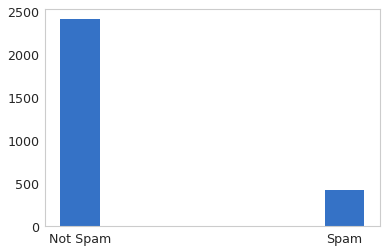

In [33]:
ind = np.arange(len(label.unique()))
ham_height = label.value_counts()[0]
spam_height = label.value_counts()[1]
plt.grid()
plt.bar(ind, [ham_height, spam_height], width = 0.15)
plt.xticks((0,1), ('Not Spam',"Spam"))